In [68]:
import pandas as pd
df = pd.read_csv('Astroids_SBDQ.csv')

print("Dataset Info:")
print(df.info())

C:\Users\Mayur\AppData\Local\Temp\ipykernel_1924\2260513174.py:2: DtypeWarning: Columns (2,3,4,16,23,24,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Astroids_SBDQ.csv')


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163342 entries, 0 to 163341
Data columns (total 79 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   spkid           163342 non-null  int64  
 1   full_name       163342 non-null  object 
 2   pdes            163342 non-null  object 
 3   name            1928 non-null    object 
 4   prefix          23 non-null      object 
 5   neo             163337 non-null  object 
 6   pha             162782 non-null  object 
 7   sats            163342 non-null  int64  
 8   H               163192 non-null  float64
 9   G               16 non-null      float64
 10  M1              0 non-null       float64
 11  M2              0 non-null       float64
 12  K1              0 non-null       float64
 13  K2              0 non-null       float64
 14  PC              0 non-null       float64
 15  diameter        12105 non-null   float64
 16  extent          12 non-null      object 
 

In [69]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# sorted by most missing values
missing_df[missing_df['Missing Values'] > 0]


,Missing Values,Percentage
K1,163342,100.000000
K2,163342,100.000000
PC,163342,100.000000
M2,163342,100.000000
M1,163342,100.000000
DT,163342,100.000000
DT_sigma,163342,100.000000
IR,163341,99.999388
GM,163336,99.996327
A3,163330,99.992653


In [70]:
threshold = 95
cols_to_drop = missing_df[missing_df["Percentage"] > threshold].index.tolist()

print(cols_to_drop)
print(len(cols_to_drop))

df = df.drop(columns=cols_to_drop)

# Display the remaining columns count
remaining_columns = df.shape[1]
dropped_columns = len(cols_to_drop)

remaining_columns, dropped_columns


['K1', 'K2', 'PC', 'M2', 'M1', 'DT', 'DT_sigma', 'IR', 'GM', 'A3', 'A3_sigma', 'extent', 'G', 'A1_sigma', 'prefix', 'A1', 'UB', 'BV', 'spec_T', 'spec_B', 'A2_sigma', 'A2', 'two_body', 'n_del_obs_used', 'n_dop_obs_used', 'name', 'rot_per']
27


(52, 27)

In [71]:
key_columns = ["full_name", "n_obs_used", "data_arc", "first_obs", "last_obs"]
missing_key_cols = df[key_columns].isnull().sum()
missing_key_cols

full_name       0
n_obs_used      0
data_arc      393
first_obs       0
last_obs        0
dtype: int64

In [72]:
numerical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns

['full_name',
 'pdes',
 'neo',
 'pha',
 'orbit_id',
 'epoch_cal',
 'equinox',
 'tp_cal',
 'class',
 'producer',
 'first_obs',
 'last_obs']

In [73]:
df["first_obs"] = pd.to_datetime(df["first_obs"], errors='coerce')
df["last_obs"] = pd.to_datetime(df["last_obs"])

In [74]:
key_columns = ["full_name", "n_obs_used", "data_arc", "first_obs", "last_obs"]
missing_key_cols = df[key_columns].isnull().sum()

missing_key_cols

full_name       0
n_obs_used      0
data_arc      393
first_obs      25
last_obs        0
dtype: int64

In [75]:
df["data_arc"] = (df["last_obs"] - df["first_obs"]).dt.days

In [76]:
key_columns = ["full_name", "n_obs_used", "data_arc", "first_obs", "last_obs"]
missing_key_cols = df[key_columns].isnull().sum()

missing_key_cols

full_name      0
n_obs_used     0
data_arc      25
first_obs     25
last_obs       0
dtype: int64

In [77]:
df["data_arc"] = df["data_arc"].fillna(df["data_arc"].median())
df["moid"] = df["moid"].fillna(df["moid"].median())
df["moid_ld"] = df["moid_ld"].fillna(df["moid_ld"].median())
df["H"] = df["H"].fillna(df["H"].median())
df["condition_code"] = df["condition_code"].fillna(df["condition_code"].mode()[0])

for col in ["per_y", "ad", "t_jup", "per", "rms", "ma"]:
    df[col] = df[col].fillna(df[col].mean())

In [78]:
print(df["pha"].unique())  # Should show only 0, 1, and NaN
print(df["pha"].value_counts())  # Count of 0s and 1s

print(df["neo"].unique())  # Should show only 0, 1, and NaN
print(df["neo"].value_counts())  # Count of 0s and 1s

['N' 'Y' nan]
pha
N    160293
Y      2489
Name: count, dtype: int64
['N' 'Y' nan]
neo
N    125434
Y     37903
Name: count, dtype: int64


In [79]:
# Convert 'pha' and 'neo' to 0 and 1
df["pha"] = df["pha"].map({"N": 0, "Y": 1})
df["neo"] = df["neo"].map({"N": 0, "Y": 1})


In [80]:
print(df["pha"].unique())  # Should show only 0, 1, and NaN
print(df["pha"].value_counts())  # Count of 0s and 1s

print(df["neo"].unique())  # Should show only 0, 1, and NaN
print(df["neo"].value_counts())  # Count of 0s and 1s

[ 0.  1. nan]
pha
0.0    160293
1.0      2489
Name: count, dtype: int64
[ 0.  1. nan]
neo
0.0    125434
1.0     37903
Name: count, dtype: int64


In [81]:
print("pha null: ", df["pha"].isnull().sum())
print("neo null: ", df["neo"].isnull().sum())

pha null:  560
neo null:  5


In [82]:
df["pha"] = df["pha"].fillna(0) # Assuming nan means not a potential hazard
df["neo"] = df["neo"].fillna(0) # Assuming nan means not a near-Earth object


In [83]:
print("pha null: ", df["pha"].isnull().sum())
print("neo null: ", df["neo"].isnull().sum())

pha null:  0
neo null:  0


In [84]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percentage
albedo,151386,92.680388
diameter_sigma,151333,92.647941
diameter,151237,92.589169
H_sigma,72070,44.122149
sigma_per,566,0.346512
sigma_ad,566,0.346512
sigma_ma,561,0.343451
sigma_a,561,0.343451
sigma_e,561,0.343451
sigma_w,561,0.343451


In [85]:
print(df["class"].unique())
print(df["class"].value_counts())

['OMB' 'MCA' 'AMO' 'IMB' 'TJN' 'CEN' 'APO' 'ATE' 'AST' 'TNO' 'IEO' 'HYA']
class
OMB    45154
IMB    31005
MCA    27871
APO    21493
TJN    15094
AMO    13357
TNO     5254
ATE     3019
CEN      913
AST      143
IEO       34
HYA        5
Name: count, dtype: int64


In [86]:
print(df.columns.tolist())


['spkid', 'full_name', 'pdes', 'neo', 'pha', 'sats', 'H', 'diameter', 'albedo', 'H_sigma', 'diameter_sigma', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'moid_jup', 't_jup', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class', 'producer', 'data_arc', 'first_obs', 'last_obs', 'n_obs_used', 'condition_code', 'rms']


In [87]:
summary_stats = df[["H", "diameter", "albedo", "e", "a", "q", "ad", "i", "moid", "data_arc", "om", "w", "ma", "n"]].describe()
summary_stats


,H,diameter,albedo,e,a,q,ad,i,moid,data_arc,om,w,ma,n
count,163342.000000,12105.000000,11956.000000,163342.000000,163342.000000,163342.000000,163342.000000,163342.000000,1.633420e+05,163342.000000,163342.000000,163342.000000,163342.000000,1.633420e+05
mean,18.489799,9.500833,0.102574,0.223373,4.645618,3.252757,6.307810,14.451433,2.314144e+00,4509.060578,173.496640,181.234260,169.330755,2.969404e-01
std,3.992322,16.353269,0.123779,0.184074,86.086967,6.253667,151.898976,9.889478,6.234451e+00,4258.373705,103.170743,103.223477,110.961783,2.132297e-01
min,-1.220000,0.002500,0.004000,0.000000,-15680.000000,0.069000,0.650000,0.010000,4.490000e-08,0.000000,0.000000,0.000000,-0.010000,2.465000e-07
25%,16.310000,3.716000,0.048000,0.080000,1.902000,1.393000,2.100000,6.740000,4.410000e-01,57.000000,84.530000,91.450000,69.292500,1.692000e-01
50%,18.240000,6.095000,0.065000,0.147200,2.366000,1.764000,3.340000,13.120000,8.090000e-01,4408.000000,170.335000,182.295000,159.780000,2.708000e-01
75%,20.120000,10.495000,0.093000,0.334200,3.238000,2.952000,3.910000,21.210000,1.970000e+00,7194.000000,258.000000,270.920000,268.897500,3.758000e-01
max,33.740000,900.000000,1.000000,1.201100,25190.000000,80.620000,50333.900000,175.980000,7.970000e+01,59844.000000,359.980000,360.000000,370.000000,3.141000e+00


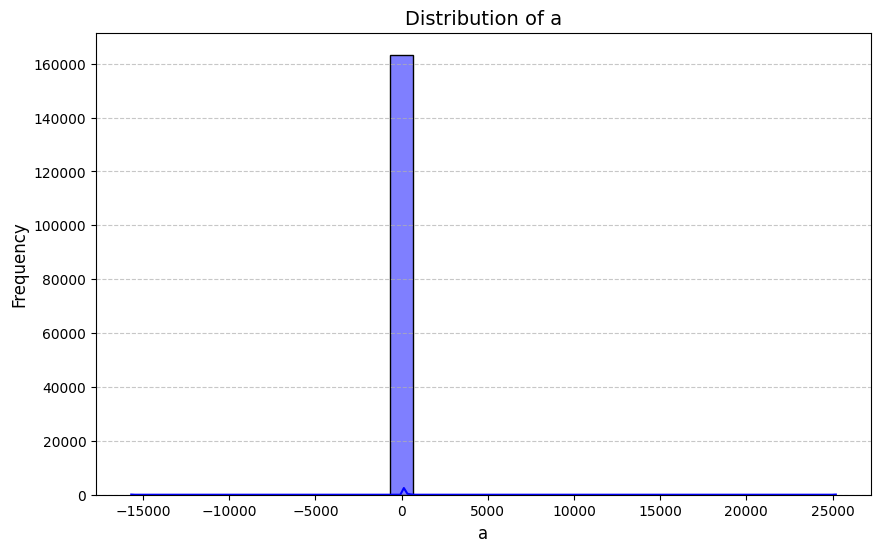

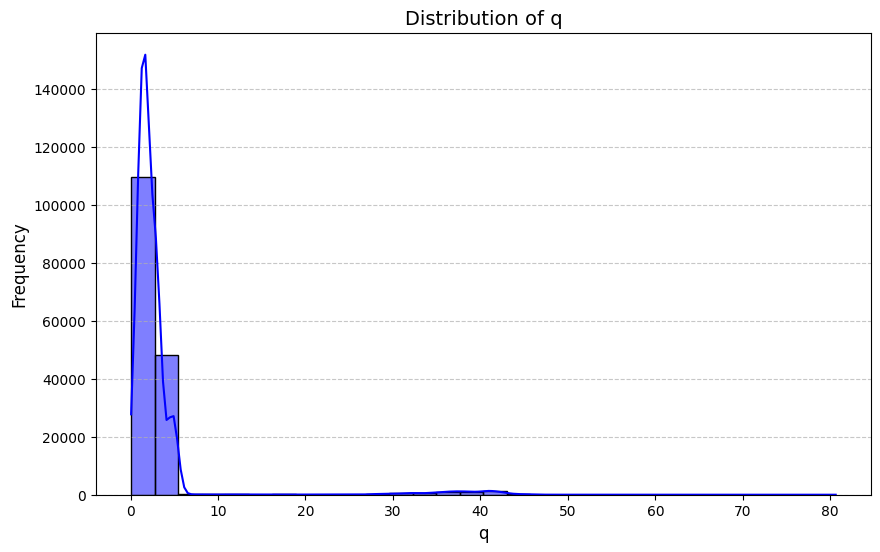

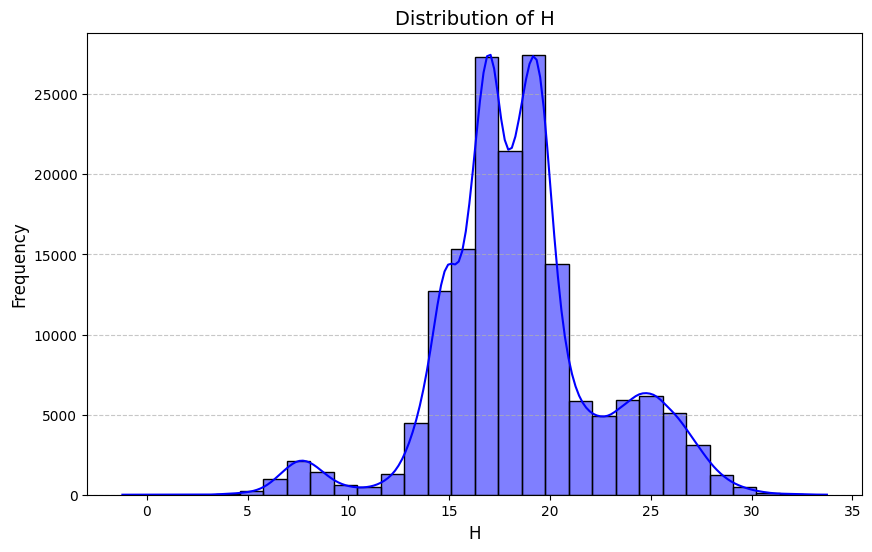

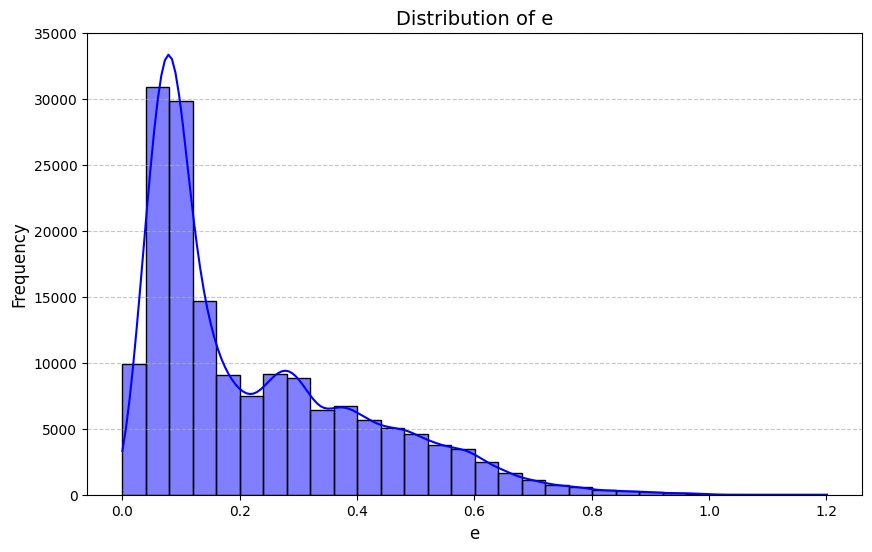

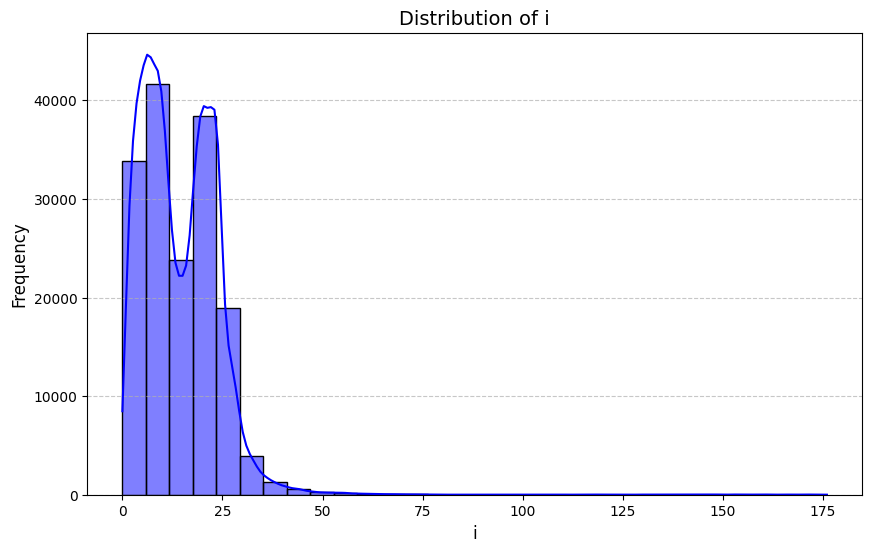

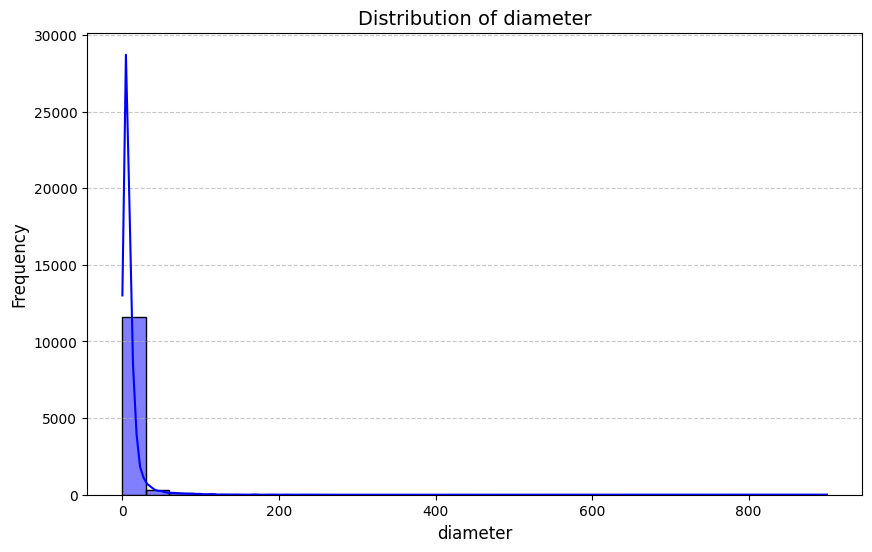

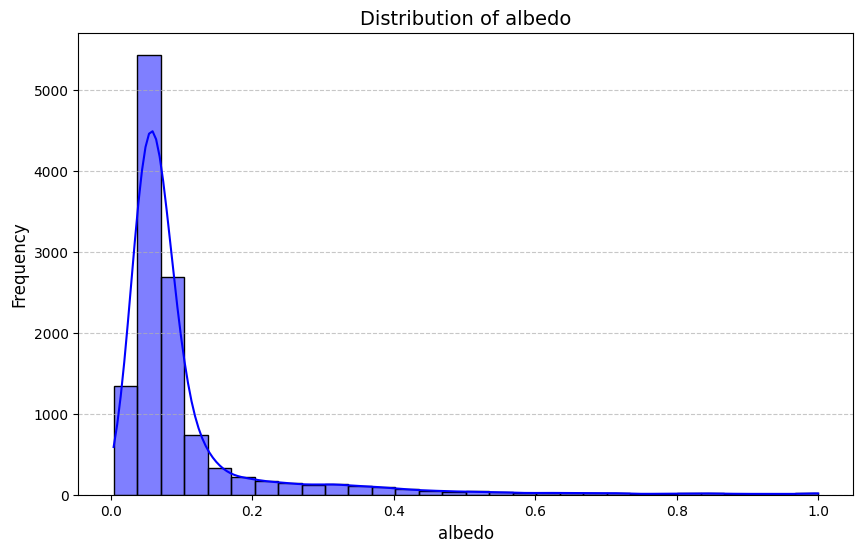

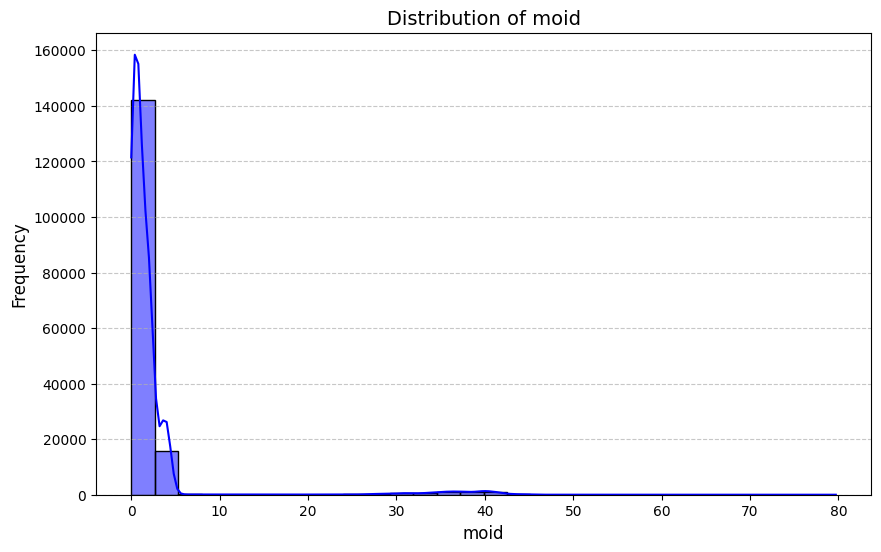

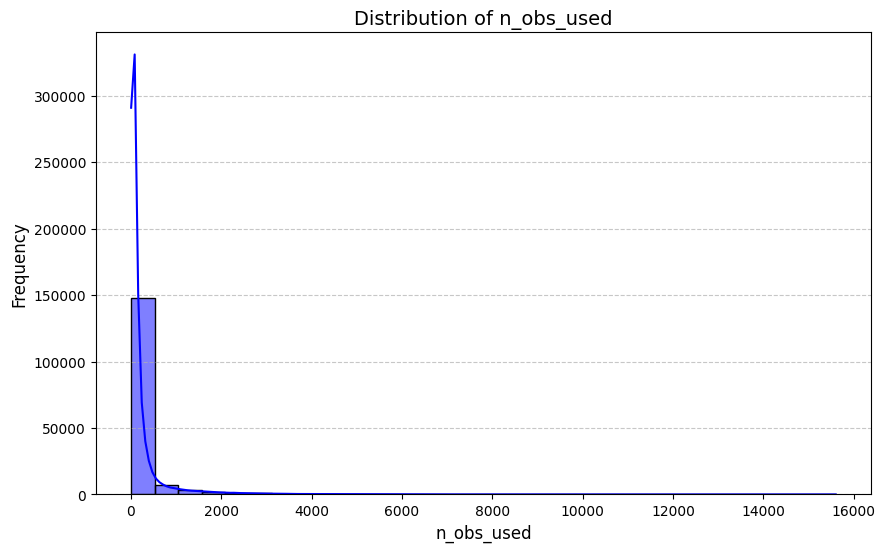

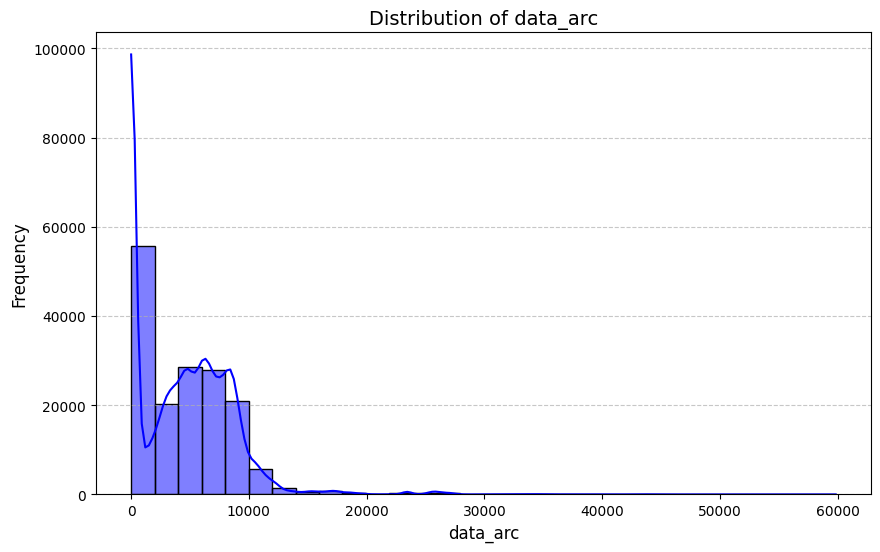

<Figure size 640x480 with 0 Axes>

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

key_features = ["a", "q", "H", "e", "i", "diameter", "albedo", "moid", "n_obs_used", "data_arc"]

for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

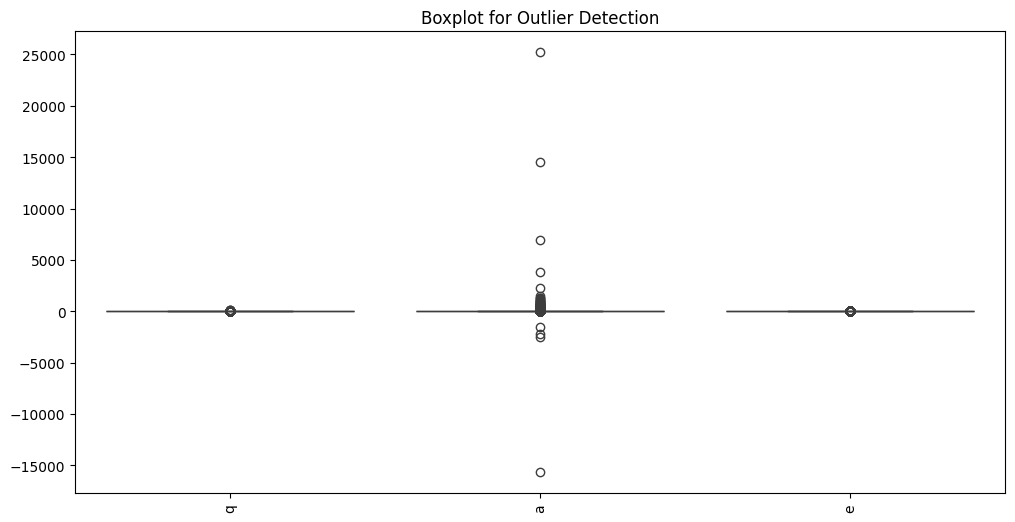

In [89]:
outlier_features = ["q", "a", "e"]

plt.figure(figsize=(12, 6))

sns.boxplot(data=df[outlier_features])
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

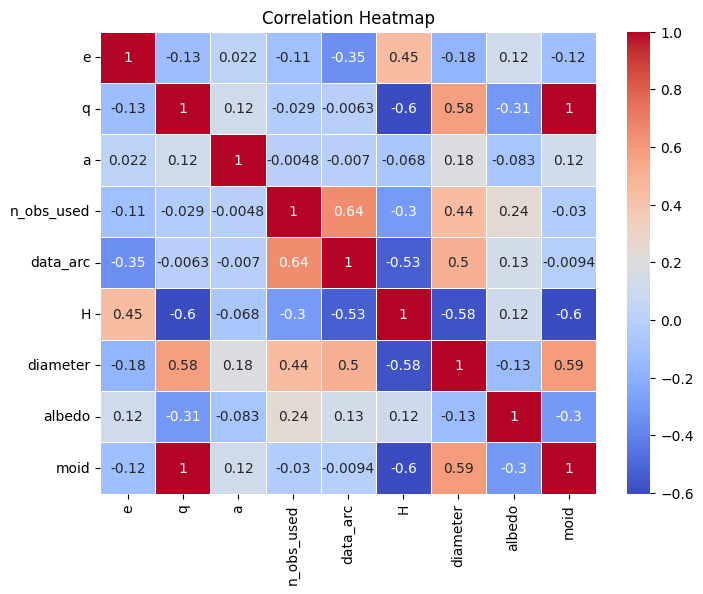

In [90]:
corr_features = ["e", "q", "a", "n_obs_used", "data_arc", "H", "diameter", "albedo", "moid"]

corr_matrix = df[corr_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


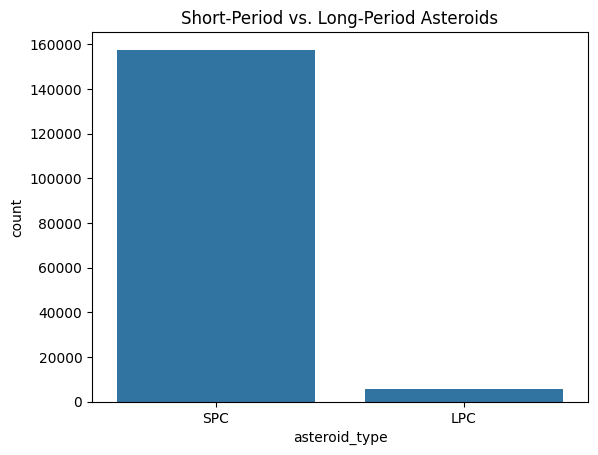

In [91]:
df["asteroid_type"] = df["a"].apply(lambda x: "SPC" if x < 10 else "LPC")
sns.countplot(x="asteroid_type", data=df)
plt.title("Short-Period vs. Long-Period Asteroids")
plt.show()


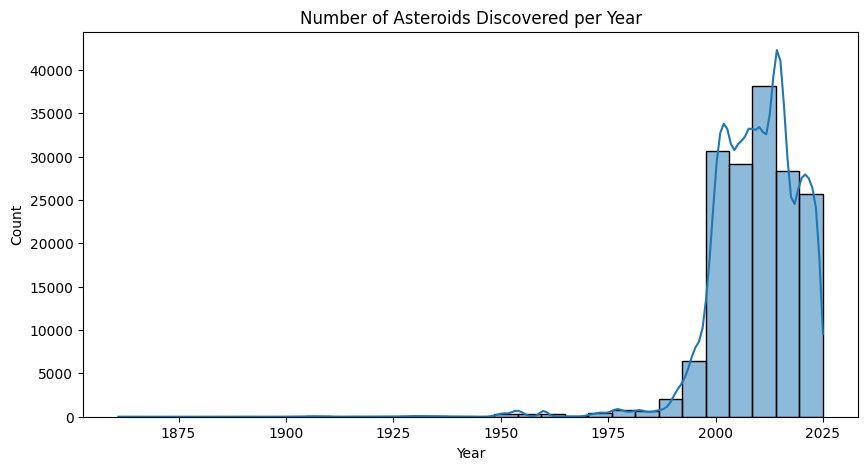

In [92]:
df["first_obs_year"] = df["first_obs"].dt.year
df["last_obs_year"] = df["last_obs"].dt.year

plt.figure(figsize=(10, 5))
sns.histplot(df["first_obs_year"], bins=30, kde=True)
plt.title("Number of Asteroids Discovered per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


In [93]:
# Potentially hazardous asteroids (PHAs)
df_pha = df[df["pha"] == 1.0]
df_pha = df_pha.sort_values(by="moid", ascending=True)

# Display top 10 closest asteroids
df_pha[["full_name", "moid", "neo", "H", "diameter"]].head(10)


,full_name,moid,neo,H,diameter
148088,(2022 SF11),0.000011,1.0,21.49,NaN
36266,523654 (2011 SR5),0.000024,1.0,20.95,NaN
6075,99942 Apophis (2004 MN4),0.000038,1.0,19.09,0.340
70673,(2010 MU112),0.000070,1.0,20.79,0.599
9773,163132 (2002 CU11),0.000071,1.0,18.61,0.460
70267,(2010 JE88),0.000074,1.0,21.50,NaN
10510,177049 (2003 EE16),0.000080,1.0,19.84,NaN
8575,143651 (2003 QO104),0.000085,1.0,16.09,NaN
144483,(2022 CY),0.000112,1.0,21.71,NaN
28185,433953 (1997 XR2),0.000121,1.0,20.96,0.259


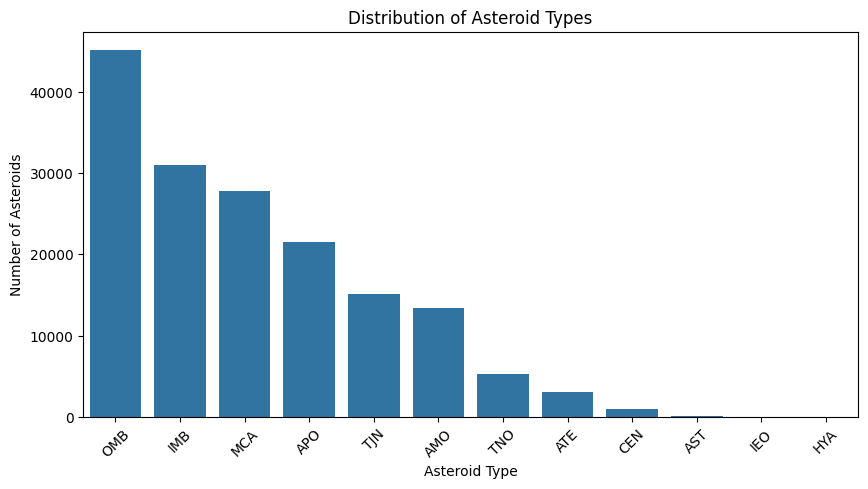

In [94]:
# Count asteroid types
asteroid_type_counts = df["class"].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=asteroid_type_counts.index, y=asteroid_type_counts.values)
plt.xlabel("Asteroid Type")
plt.ylabel("Number of Asteroids")
plt.title("Distribution of Asteroid Types")
plt.xticks(rotation=45)
plt.show()


In [95]:
fastest_asteroids = df.sort_values(by="per_y", ascending=True)[["full_name", "per_y", "H", "q", "e"]].head(10)
fastest_asteroids


,full_name,per_y,H,q,e
139448,(2021 PH27),0.314,17.69,0.133,0.7116
142924,(2021 VR3),0.390,18.01,0.313,0.4139
122779,(2019 LF6),0.414,17.28,0.317,0.4293
42681,594913 'Aylo'chaxnim (2020 AV2),0.414,16.20,0.457,0.1772
119988,(2019 AQ3),0.452,17.48,0.404,0.3144
136018,(2021 BS1),0.463,18.59,0.396,0.3376
79603,(2013 JX28),0.466,20.10,0.262,0.5642
151018,(2023 EY2),0.469,19.75,0.398,0.3398
120687,(2019 BE5),0.476,25.10,0.208,0.6592
26961,418265 (2008 EA32),0.483,16.48,0.428,0.3050


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# Features for classification
X = df[["moid", "e", "q", "a", "H", "i"]]
y = df["pha"]

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Apply SMOTE on training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Step 3: Feature scaling
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

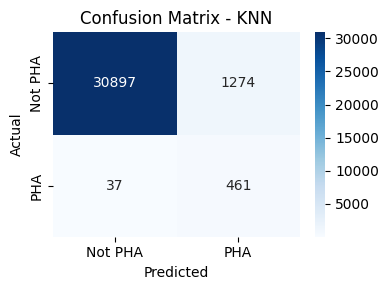

Accuracy: 0.9599
F1 Score (PHA=1): 0.4129
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     32171
         1.0       0.27      0.93      0.41       498

    accuracy                           0.96     32669
   macro avg       0.63      0.94      0.70     32669
weighted avg       0.99      0.96      0.97     32669



In [107]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res_scaled, y_train_res)

# Step 5: Predict and evaluate
y_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label=1)


plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not PHA', 'PHA'], 
            yticklabels=['Not PHA', 'PHA'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.tight_layout()
plt.show()

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score (PHA=1): {f1:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

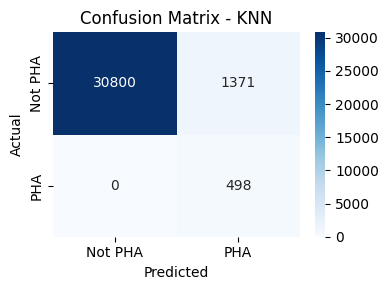

Logistic Regression
Accuracy: 0.9580
F1 Score (PHA=1): 0.4208
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     32171
         1.0       0.27      1.00      0.42       498

    accuracy                           0.96     32669
   macro avg       0.63      0.98      0.70     32669
weighted avg       0.99      0.96      0.97     32669





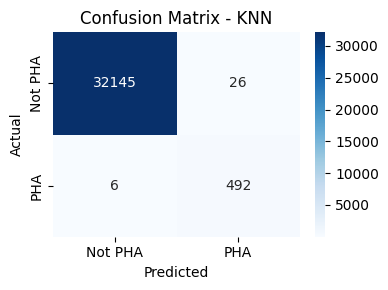

Random Forest
Accuracy: 0.9990
F1 Score (PHA=1): 0.9685
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     32171
         1.0       0.95      0.99      0.97       498

    accuracy                           1.00     32669
   macro avg       0.97      0.99      0.98     32669
weighted avg       1.00      1.00      1.00     32669





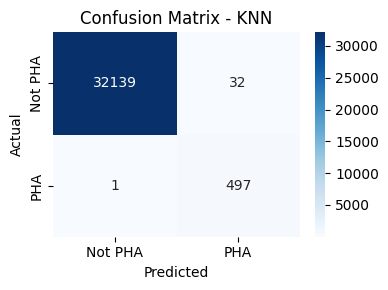

Decision Tree
Accuracy: 0.9990
F1 Score (PHA=1): 0.9679
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     32171
         1.0       0.94      1.00      0.97       498

    accuracy                           1.00     32669
   macro avg       0.97      1.00      0.98     32669
weighted avg       1.00      1.00      1.00     32669





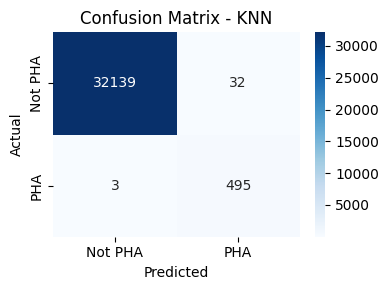

Gradient Boosting
Accuracy: 0.9989
F1 Score (PHA=1): 0.9659
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     32171
         1.0       0.94      0.99      0.97       498

    accuracy                           1.00     32669
   macro avg       0.97      1.00      0.98     32669
weighted avg       1.00      1.00      1.00     32669





In [106]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(class_weight="balanced", max_depth=10, min_samples_leaf=5, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, class_weight="balanced", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
}

for name, clf in models.items():
    if name == "Logistic Regression":
        clf.fit(X_train_res_scaled, y_train_res)
        y_pred = clf.predict(X_test_scaled)
    else:
        clf.fit(X_train_res, y_train_res)
        y_pred = clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=1)


    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not PHA', 'PHA'], 
                yticklabels=['Not PHA', 'PHA'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - KNN')
    plt.tight_layout()
    plt.show()

    print(f"{name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (PHA=1): {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")
